## Simple Linear Regression

### Base prediction csv

In [24]:
# Video: https://www.youtube.com/watch?v=8jazNUpO3lQ
# y = mx + b
# in this case, price = m*area + b

In [25]:
# importing useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [26]:
# importing data as df(data frame)
df = pd.read_csv("houses.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


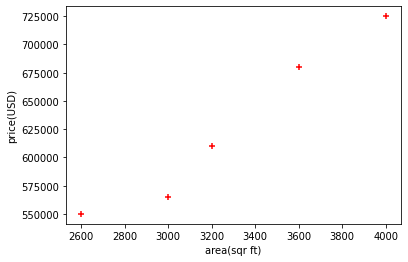

In [27]:
# for scatter, 1st constarint is the x axis data, 2nd is the y axis, then everthing else is optional.
# we are using color as red and the marker as +
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price(USD)')
plt.scatter(df.area, df.price, color = 'red', marker = '+')

In [28]:
# starting with linear regression
# the "linear_model" has been inmported through sklearn
# fitting(fit) the data means youre training the linear reg model using the avialable data points
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression()

In [29]:
# now starting to predict
# the model calculated the value for m and b
reg.predict([[3300]])

array([628715.75342466])

In [30]:
# showing the value of the coefficient which is m
reg.coef_

array([135.78767123])

In [31]:
# value for b
reg.intercept_

180616.43835616432

In [33]:
# y = m*x + b
# substituting values for m, x and b comes out to be the price (y)
135.78767123*3300 + 180616.43835616432

628715.7534151643

In [35]:
reg.predict([[5000]])

array([859554.79452055])

### List of areas csv

In [36]:
# for our csv which has a list of areas, we need to predict corresponding prices based on this model

In [37]:
d = pd.read_csv("justareas.csv")
d

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [40]:
# predicting for all values in justareas.csv
justareas = reg.predict(d)
justareas

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [45]:
# Creating a new column in the data frame 'd' which includes the prices for justareas
d['prices'] = justareas

# seeing the new dataframe with the price values
d

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [48]:
# creating a new csv file with the predicted prices data
# exported to the same folder the code is in
d.to_csv("predicted.csv")

In [49]:
# to remove indexed from the csv file
d.to_csv("predicted2.csv", index = False)

### Other

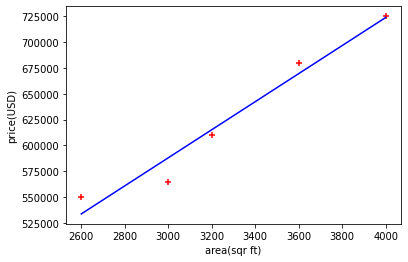

In [50]:
# same as above plot
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price(USD)')
plt.scatter(df.area, df.price, color = 'red', marker = '+')

# to include the prediction line
plt.plot(df.area, reg.predict(df[['area']]), color = 'blue')